## Logistic Regression
 来源于《机器学习实战》第五章逻辑回归,使用逻辑回归解决二分类问题。 
 

init 11111
feature number: 2
xArr.shape: (3, 100) (1, 100)
(1, 3)
loss sum: [69.31471806]
loss sum: [55.60563388]
loss sum: [51.93660697]
loss sum: [48.7534158]
loss sum: [45.97939562]
loss sum: [43.54948023]
loss sum: [41.40920554]
loss sum: [39.51335645]
loss sum: [37.82455117]
loss sum: [36.31191942]
loss sum: [34.94994239]
loss sum: [33.71747178]
loss sum: [32.5969188]
loss sum: [31.57359303]
loss sum: [30.63516758]
loss sum: [29.77124824]
loss sum: [28.97302675]
loss sum: [28.23300171]
loss sum: [27.54475326]
loss sum: [26.90276081]
loss sum: [26.30225502]
loss sum: [25.73909708]
loss sum: [25.20967982]
loss sum: [24.71084646]
loss sum: [24.23982339]
loss sum: [23.79416446]
loss sum: [23.37170449]
loss sum: [22.9705204]
loss sum: [22.58889849]
loss sum: [22.22530682]
loss sum: [21.87837186]
loss sum: [21.54685853]
loss sum: [21.22965319]
loss sum: [20.92574914]
loss sum: [20.63423396]
loss sum: [20.35427879]
loss sum: [20.0851289]
loss sum: [19.82609556]
loss sum: [19.57654894]
lo

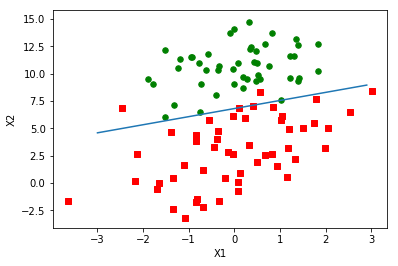

In [3]:
# %load lr.py
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LogisticRegression:
    def __init__(self):
        print("init 11111")
        self.__learning_rate = 0.0001
        
    def __sigmoid(self, x):    
        return 1.0/(1+ np.exp(-x))      
    
    def gradDesc(self, data, label):
        xMat = np.mat(data); yMat = np.mat(label).T
        
        xArr = np.array(data, dtype=np.float64).T
        n,m = xArr.shape
        
        yArr = np.array(label, dtype=np.float64).reshape(1, m)
        
        print("xArr.shape:", xArr.shape, yArr.shape)
        self.__W = np.zeros((1, n), dtype=np.float64)
        self.__b = 0.0
        print(self.__W.shape)
        step = 10000
        alpha = self.__learning_rate
        
        for i in range(step):
            y_hat = self.__sigmoid(self.__W.dot(xArr) + self.__b)
            loss = y_hat - yArr

            self.__W = self.__W - alpha*loss.dot(xArr.T)

            self.__b = self.__b - alpha*loss
            if(i%100 == 0):
                ones_array = np.ones((1, m))
                
                loss_arr = -yArr*np.log(y_hat)-(ones_array-yArr)*np.log(ones_array - y_hat)

                loss = np.sum(loss_arr, axis=1)
                print("loss sum:", loss)
        return self.__W
    
    def predict(self, testData, testLabel):
        xArr = np.array(testData, dtype=np.float64).T
        n, m = xArr.shape
        yArr = np.array(testLabel, dtype=np.float64).reshape(1, m)
        
        y_hat = self.__sigmoid(self.__W.dot(xArr) + self.__b)
        print("y_hat shape:", y_hat.shape)
        
        right = 0
        for i in range(m):
            if((yArr[0][i]==1) and (y_hat[0][i]>0.5)):
                right += 1
            elif ((yArr[0][i]==0) and (y_hat[0][i]<=0.5)):
                right += 1
        print ("err rate:", right / m)
        return
        

    def plotwieght(self, weight, cycle_number):
        fig = plt.fighre()
        ax = fig.add_subplot(131)
        ax.scatter(cycle_number, weight[0])
        plt.show()

    def plotBestFit(self, weight):
        import matplotlib.pyplot as plt
        dataMat,labelMat = loadDataSet("testSet.txt")
        xcord1=[]; ycord1=[]
        xcord2=[]; ycord2=[]
        dataArr = np.array(dataMat)
        m,n = np.shape(dataMat)
        for i in range(m):
            if(int(labelMat[i]) == 1):
                xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
            else:
                xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])       
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
        ax.scatter(xcord2, ycord2, s=30, c='green')
        x= np.arange(-3.0, 3.0, 0.1)
        y = (-weight[0][0]-weight[0][1]*x)/weight[0][2]
        ax.plot(x, y)
        plt.xlabel('X1'), plt.ylabel('X2')
        plt.show()


def loadDataSet(fileName):
    numFeature = len(open(fileName).readline().split('\t')) - 1
    print ("feature number: %d" % numFeature)
    dataMat = []; labelMat = []

    with open(fileName) as myfile:
        for line in myfile.readlines():
            lineArr = []
            curLine = line.split('\t')
            lineArr.append(1.0)

            for i in range(numFeature):
                lineArr.append(float(curLine[i]))
            dataMat.append(lineArr)
            labelMat.append(float(curLine[-1]))
    #print ("dataMat ", dataMat)
    return dataMat,labelMat

if __name__ == "__main__":
    lr = LogisticRegression();
 
    #testSet is the simple dataSet
    data,label = loadDataSet("testSet.txt")

    W1 = lr.gradDesc(data, label)
    #W2 = lr.stocGradDesc1(xArr, yArr, 1500)

    print(W1)

    lr.plotBestFit(W1)
